<div style="text-align: center">
    <h1>Project 1 - House Price Prediction</h1>
    <h2>Linear Regressions</h2>
    <h3>(Simple, Multiple, Ridge, Lasso, ElasticNet)</h3>
</div>
<br>
<br>
<div style="text-align: right">
    <h4><u>Table Of Contents:</u></h4>
        <h4 id="part-1">Part 1 Simple Linear Regression - <u>an univariate approach - An intro</u></h4>
        <h5 name="part-2">Part 2 Multiple Linear Regression - <u>a multivariate approach - A comprehensive ML method</u></h5>
</div>

[](#part-1)
<div style ="text-align: center">
    <font size="4"><b>Part 1 Simple Linear Regression - an univariate approach</b> </font>
</div>
<div style ="text-align: center">
<font size="3"><br>Regression models helps us make predictions about the population based on sample data.
<br>Here in this first section as an univariable method i will create a simple regression model <br>with the help of <b>StatsModels</b>, to introudce the concept of Linear Regresison.<br>
</font>
</div>

<br><br>
<div style ="text-align: left">
    <u><i><b>random, pandas, mathplotlib, seaborn, statsmodels</b></i></u>
</div>
<div style="text-align: right"><font size=3><u>database:</u> db_house_update_by_me.csv  <br><i>\ simple database update.ipynb \</i></font></div>
<br><br>


<u><b><font size=4>Simple linear regression model</font></b></u><br>



<table style="width:100%">
  <tr>
    <th style="text-align: center">
        Model  <br> <font size="3"> ${y} = {\beta}_{0} +  {\beta}_{1}X_{i} + {\epsilon}_{i}$
        </font>
    </th>
    <th style="text-align: center">
        Equation <br> <font size="3"> $\hat{y} = \hat{\beta}_{0} +  \hat{\beta}_{1}X_{i} + \hat{\epsilon}_{i} $
        </font>
    </th>
  </tr>
  <tr> 
    <td style="text-align: left">$y$ -  dependent variable,</td>
    <td style="text-align: left">$\hat{y}$− estimated, predicted value</td>
  </tr>
  <tr> 
    <td style="text-align: left">$x$ – independent variable</td>
    <td style="text-align: left">$x$ – i-th element of the sample data independent variable</td>
  </tr>
  <tr> 
    <td style="text-align: left">${\beta}_{0}$ - constatnt</td>
    <td style="text-align: left">$\hat{\beta}_{0}$ − estimate of the regressor, constant</td>
  </tr>
  <tr> 
    <td style="text-align: left">${\beta}_{1}$ − slope</td>
    <td style="text-align: left">$\hat{\beta}_{1}$ − estimate of beta one, quantifies the effect the independent on the dependent</td>
  </tr>
  <tr> 
    <td style="text-align: left">${\epsilon}_{i}$ − error</td>
    <td style="text-align: left">$\hat{\epsilon}_{i}$ - estimator of the error, <i>residual</i></td>
  </tr>
</table>

<div>
<img src='image/linreg.jpg', width="400", align='left'>
</div>


<b>sum of squares total (SST)</b><br>
    <font size="3">
        ${\sum}_{i=1}^{n}(y_{i} - \overline{y})^2$
    </font>
<br>

<b>sum of squares regression (SSR)</b><br>
    <font size="3">
        ${\sum}_{i=1}^{n}(\hat{y}_{i} - \overline{y})^2$
    </font>
<br>
<b>sum of squares error (SSE)</b><br>
    <font size="3">
        ${\sum}_{i=1}^{n}e_{i}^2 = {\sum}(y_{i} - \hat{y}_{i})^2$
    </font>

<br>
<br>

<b>OLS - Ordinary Least Squares</b><br><i>to estimate the linear regresssion equation</i>
<br><br>
<u>for lowering SSE(RSS).</u><t>
 *lower SSE --> better explanatory power* <br> 




In [1]:
# import relevant libraries prior to first approach

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
sns.set()

#### <u>Load the DataSet<u>
<br>

This first simple dataset (*.csv) was altered by me . I aimed to enhance the analytical depth (dimension) of the original dataframe (df) through that work. The original df had these columns, which i left unaltered: 'price', 'size', 'year', to which i added: 'bedrooms', 'pool_available' and 'garage' columns (features). <br><br>
Although I made an effort to increase its complexity, I came to realize that, among other factors, it remains a relatively small database with just 100 observations. (see in documentation: simple databese update.ipynb)<br>

For those reason i'm using this ds only here in the first part of this first project. Later on i will use <a href="https://www.kaggle.com/">kaggle</a> datasets.

In [2]:
# load the dataset and keep it safe
data_raw = pd.read_csv('data/db_house_update_by_me.csv') #github version will need other link!?

data = data_raw.copy()

In [3]:
data


,price,size,year,bedrooms,pool_available,garage
0,234314.144,643.09,2015,1,no,yes
1,228581.528,656.22,2009,2,no,no
2,281626.336,487.29,2018,3,no,no
3,401255.608,1504.75,2015,4,no,no
4,458674.256,1275.46,2009,4,yes,yes
...,...,...,...,...,...,...
95,252460.400,549.80,2009,2,no,no
96,310522.592,1037.44,2009,3,no,no
97,383635.568,1504.75,2006,2,yes,no
98,225145.248,648.29,2015,2,no,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           100 non-null    float64
 1   size            100 non-null    float64
 2   year            100 non-null    int64  
 3   bedrooms        100 non-null    int64  
 4   pool_available  100 non-null    object 
 5   garage          100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


##### <u>Preliminary exploration of the dataset</u>

In [5]:
to_show = 9 #this part added by me

from IPython.display import display_html ## display setup is from stackoverflow: 
from itertools import chain,cycle        ## jupyter-notebook-display-two-pandas-tables-side-by-side

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True )##^^ 
    
display_side_by_side(data.head(to_show),data.describe(include="all"), titles=[
                                                                'df head('+str(to_show)+')',
                                                                "df's Descriptive Statisctis"])

,price,size,year,bedrooms,pool_available,garage
0,234314.144,643.09,2015,1,no,yes
1,228581.528,656.22,2009,2,no,no
2,281626.336,487.29,2018,3,no,no
3,401255.608,1504.75,2015,4,no,no
4,458674.256,1275.46,2009,4,yes,yes
5,245050.280,575.19,2006,2,no,no
6,265129.064,570.89,2015,1,yes,no
7,175716.480,620.82,2006,1,no,no
8,331101.344,682.26,2018,3,no,no
,price,size,year,bedrooms,pool_available,garage


In [6]:
# creating a function that could be used later on in part 2
def get_columns_by_dtype(df):
    numeric_var = []
    categorical_var = []

    for col in df.columns:
        if df[col].dtype == 'float64':
            numeric_var.append(col)
        elif df[col].dtype == 'int64':
            numeric_var.append(col)
        else:
            categorical_var.append(col)

    print(f'List of numeric variables: \n'
          +'{} \n\n'.format(numeric_var)
          +'List of categorical variables:\n '
          +'{}'.format(categorical_var))

In [7]:
get_columns_by_dtype(data)

List of numeric variables: 
['price', 'size', 'year', 'bedrooms'] 

List of categorical variables:
 ['pool_available', 'garage']


The dependent variable (target) here, is giong to be the 'price' column, since our model is going to predict house prices based on one independent variable (feature).<br>


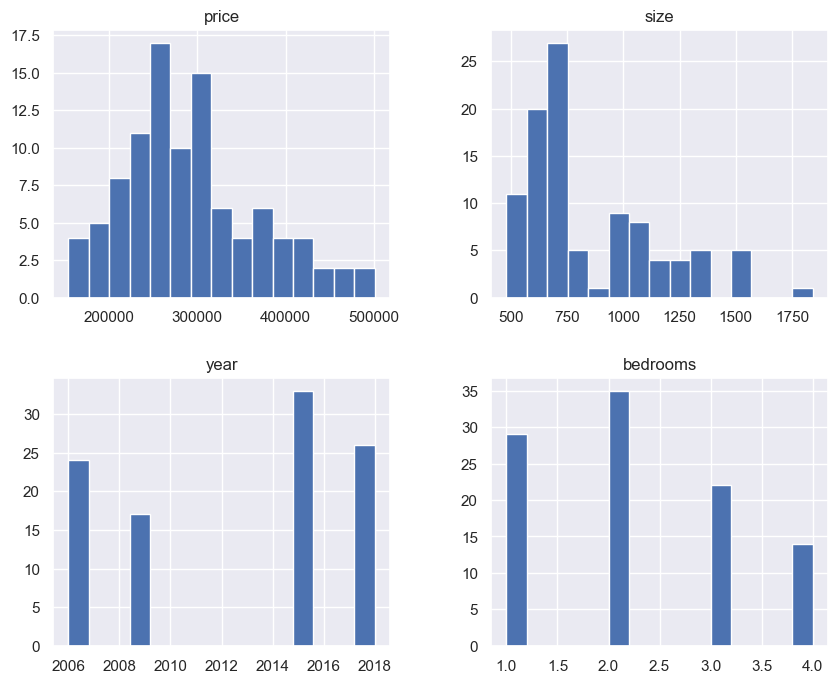

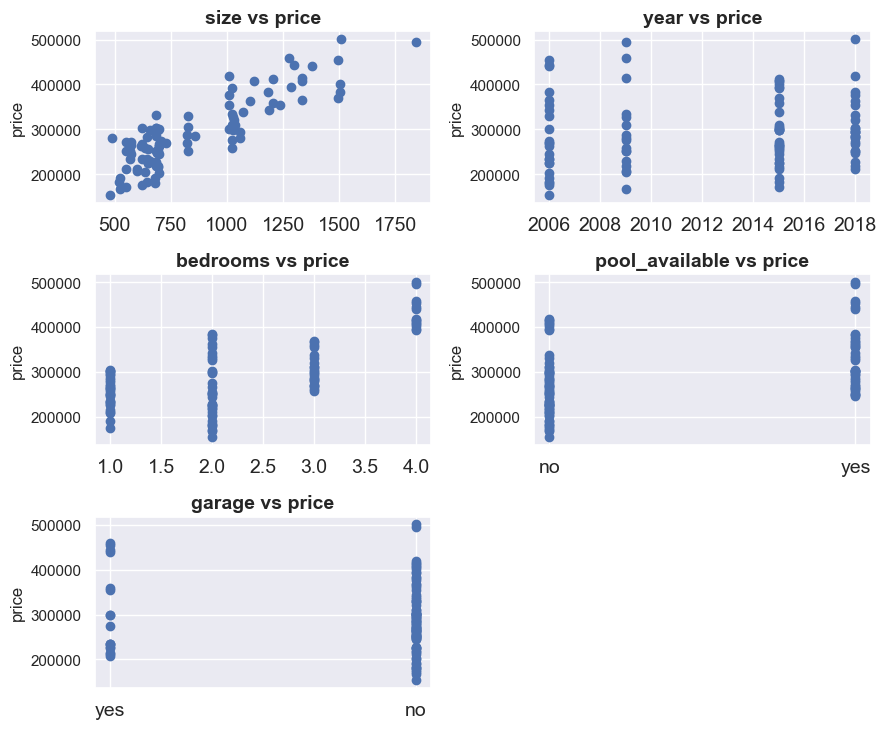

In [8]:
data.hist(bins = 15, figsize=(10,8))

# dependent variable
y = data['price']
# possible features names list
features = data.drop('price', axis = 1).columns.values

plt.figure(figsize=(9,12))

for i, num in enumerate(features):
    ax = plt.subplot(len(features), 2, i+1)
    plt.scatter(x=data[num], y=y)
    plt.title(num +' vs price', fontsize=14, fontweight='bold')
    ax.set_ylabel('price')
    plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

Based on these scatter plots above, since i'm building a single regression model, i would choose 'size' as single feature, as it shows lin. realtionship with 'price'.

In [9]:
single_reg_data = data.loc[:, ['price','size']]

##### Further investigation on the target and feature

In [10]:
single_reg_data.head(2)

,price,size
0,234314.144,643.09
1,228581.528,656.22


In [11]:
def values_to_int_and_round(df): # to convert all values to int and round if necess.
    columns = df.columns
    for i in columns:
            df[i] =[int(j) for j in df[i].values] # to int
            
            if i == 'price':
                df[i] = df[i].round(-1) # to round price, few bucks lost wont hurt
            else:
                df[i] = df[i].round(0) # or not to round

In [12]:
values_to_int_and_round(single_reg_data)

In [13]:
single_reg_data.head()

,price,size
0,234310,643
1,228580,656
2,281630,487
3,401260,1504
4,458670,1275


In [14]:
target = single_reg_data.loc[:, ['price']]
feature = single_reg_data.loc[:, ['size']]

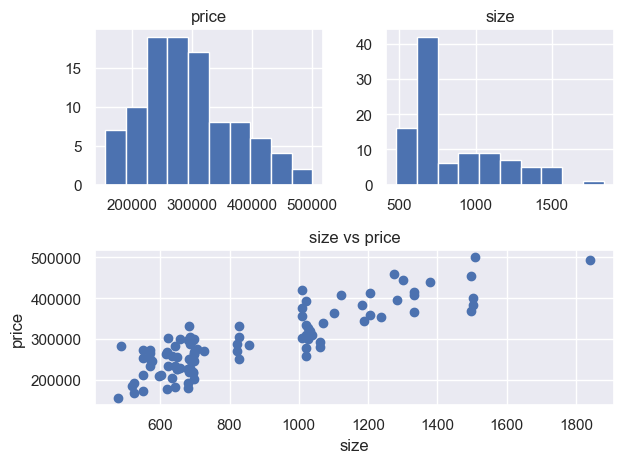

In [15]:
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(target)
ax1.set_title('price')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(feature)
ax2.set_title('size')

ax3 = fig.add_subplot(gs[1, :])
ax3.scatter(feature, target)
ax3.set_title('size vs price')
ax3.set_xlabel('size')
ax3.set_ylabel('price')

fig.align_labels()
plt.show()


### Regressison


In [16]:
#add constant b0
feature_wconst = sm.add_constant(feature)
#build model
model = sm.OLS(target, feature_wconst)
#acquire results
results= model.fit()

#check results
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.10e-31
Time:                        13:25:43   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.02e+05   1.19e+04      8.561      0.000    7.84e+04    1.26e+05
size         223.2005     13.199     16.910      0.000     197.007     249.394
==============================================================================
Omnibus:                        6.271   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                2.941
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.193   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
results.params[1]

223.20052438049188

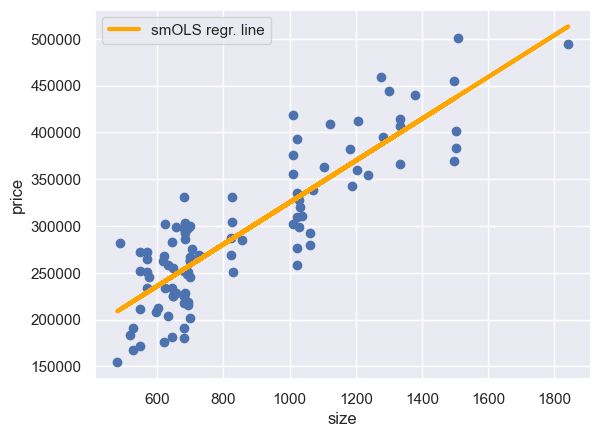

In [18]:
# y_hat = 1.019e+05 + 223.1557 * feature
y_hat = results.params[0] + results.params[1] * feature
plt.scatter(feature, target)
fig = plt.plot(feature, y_hat, lw=3, c='orange', label='smOLS regr. line')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()
plt.show()

As some practice since theres a somewhat working model based on size and price, one can make predictions on 'prices' based on arbitrary 'size' values, using the scores from OLS regression

In [19]:
import random
new_sizes = random.sample(range(int(feature.min()), int(feature.max())), 10)

pred_table = pd.DataFrame(data = new_sizes, columns=['size'])
pred_table['predicted_price_based_on_statsmodOLS'] = int(
    results.params[0]) + int(results.params[1]) * pred_table['size']
pred_table.sort_values('size')

,size,predicted_price_based_on_statsmodOLS
1,512,216175
5,877,297570
3,1431,421112
6,1460,427579
4,1523,441628
0,1621,463482
7,1643,468388
2,1647,469280
9,1660,472179
8,1772,497155


As i mentioned in the first part of this section, my intentions were not build a true ML model, just to get familiar with the basic concept of regression.


In the next part i will use a kaggle dataset, and try to build a model on that, while using better ML approaches. <br><br>I'm using kaggle dataset because its closer to a 'real world problem' as it is bigger, and more complex than the one I used here.
<br>
<br>



-------------------------------------------------------

<div style="text-align: center"><font size="4">AI ⊇ ML ⊇ NN ⊇ DL </font></div>

--------------

<br><br>
[](#part-2)
<div style ="text-align: center">
    <font size="6"><b>Part 2 Multiple Linear Regression - a multivariate approach</b> </font>
</div>
<br><br>
<div style ="text-align: left">
    <u><i><b>pandas, mathplotlib, seaborn, statsmodels, sklearn</b></i></u>
    
<img src="image/housing.jpg" width="350" height="650">
    
</div>
<div style="text-align: right"><font size=3><u>database:</u> kaggle  <br><i>House Prices - Advenced Regression Techniques</i><br>
<br>data_description.txt<i></i>
<br>train.csv<i></i>
<br>test.csv<i></i>
<br>sample_submission.csv<i></i></font></div>
<br><br>


<font size="5"><i><b>PART 2 Objectives: </b></i></font><br>

<ul> <font size="4"><b><b>1.</b> Get familiar with the dataset from kaggle and prepare it better for ML model</b></font></ul>
       <li>  <font size="3"><b>1.1</b> <u>Data Exploration</u> and <u>Eploratory Data Analysis</u></font></li>
       <li>  <font size="3"><b>1.2</b> <u>Data Preprocess</u></font>; <br>
    <font size="2"><i>duplicates, missing values, outliers, skewness and kurtosis</i></font></li>
       <li>  <font size="3"><b>1.3</b> <u>Data Manipulation</u></font> </li>
    <font size="2"><i> train-test split to avoid overfit of the model and data leakage in the upcoming data preparation steps </i></font></li> 
     <li>  <font size="3"><b>1.4</b> <u>Feature Engineering;</u></font> <br>
    <font size="2"><i>dealing with categorical values<br></i></font>
    <font size="2"><i>scale </i></font>
    <font size="2"><i>(except label encoded / dummy ones)</i></font>
     </li>
    <li>  <font size="3"><b>1.5</b> <u>Feature Selection</u></font>
    </li>
     <ul> <font size="4"><b><b>2.</b> Create a model that predicts house prices.</b></font></ul>
       <li> - evaulation of different models, and their respective scores like r2, adjusted-r2, mse, rmse, etc </li>
    </ul>


<table style="width:100%">
  <tr>
    <th style="text-align: left">
        <b>MSE - Mean Squared Error </b> 
    </th>
    <th style="text-align: center">
        $R^2$: <br> 
        </th>
    <th style="text-align: right">
        adjusted - $R^2$: <br> 
        </th>
  </tr>
  <tr> 
    <td style="text-align: left"><font size=2>$MSE=\frac{SSE}{n}=\frac{{\sum}(y_{i}-\hat{y}_{i})^2}{n}$</font></td>
      <td style="text-align: center"><font size=2>$R^2 = \frac{SSR}{SST} = \frac{variability explained by the regression}{total variability of the dataset}$</font></td>
      <td style="text-align: right"><font size=2>$1-(1-R^2) * \frac{n-1}{n-p-1}$</font></td>
  </tr>
</table>

<div style="text-align: right">
<i>where: <br>
    n - number of observations <br>
    p - number of features (input variables)</i>
</div>

## Load and keep safe the data

the df was already splitted into train and test dataset. In the working of this project, i realized, that for a working model, i should preprocess the test_data as well.


In [20]:
raw_data_train = pd.read_csv('data/kaggle_1/train.csv')
raw_data_test = pd.read_csv('data/kaggle_1/test.csv')
raw_data_solutions = pd.read_csv('data/kaggle_1/sample_submission.csv')

#data for model
train_data = raw_data_train.copy() 

#data for predictions (without SalePrice)
test_data = raw_data_test.copy() 

#true SalePrice to compare predictions
true_solutions_data = raw_data_solutions.copy() 

In [21]:
pd.set_option('display.max_columns', None)
train_data.head(2)
#test_data.head(2)
#true_solutions.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [22]:
pd.reset_option('display.max_columns')

## Data exploration - getting familiar with the df

In [23]:
origi_train_shape = train_data.shape
origi_test_shape = test_data.shape

print('shape of train set: ', origi_train_shape)
print('shape of test set: ', origi_test_shape)

shape of train set:  (1460, 81)
shape of test set:  (1459, 80)


In [24]:
# train_data.info()

- For train df, we have 1460 entries (observations), and 81 variables (columns)
- For test df, we have 1459 entries (observations), and 80 ariables (columns) --> SalePrice is absent cause we will try to predict that 
- Both of the dfs has quantitative/numeric and qualitative\categorical values. 
    - Numeric probably should be scaled later on 
    - Categorical: must be dealt with, either with creation of dummies, or with label encoding, or both
- The dfs have some specific missing values, witch could have some special meaning that should be checked in the df's 'data_description.txt', and considered accordingly in the steps of data preparation
- Also, the df probably has some features that seems numeric but it might be handled as a categoric one.
<br><br>


In [25]:
pd.set_option('display.max_columns', None)
train_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [26]:
 get_columns_by_dtype(train_data)

List of numeric variables: 
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

List of categorical variables:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'F

In [27]:
#subset1 = train_data.loc[train_data['LotArea']<20000,['LotArea']]
#subset2 = train_data.loc[train_data['GrLivArea']<3000,['GrLivArea']]
#plt.scatter(subset1, subset2[:-35])
#subset1.shape

## Exploratory Data Analysis (EDA)

Starting with the target 'SalePrice' <br> 
and a similar feature as in part 1:  'GrLivArea'

In [28]:
train_data[['SalePrice', 'GrLivArea']].describe()

,SalePrice,GrLivArea
count,1460.000000,1460.000000
mean,180921.195890,1515.463699
std,79442.502883,525.480383
min,34900.000000,334.000000
25%,129975.000000,1129.500000
50%,163000.000000,1464.000000
75%,214000.000000,1776.750000
max,755000.000000,5642.000000


min seems okay (none of them have 0 values, neither missing ones), <br> max bit high --> probably has some skewness, hence some outliers

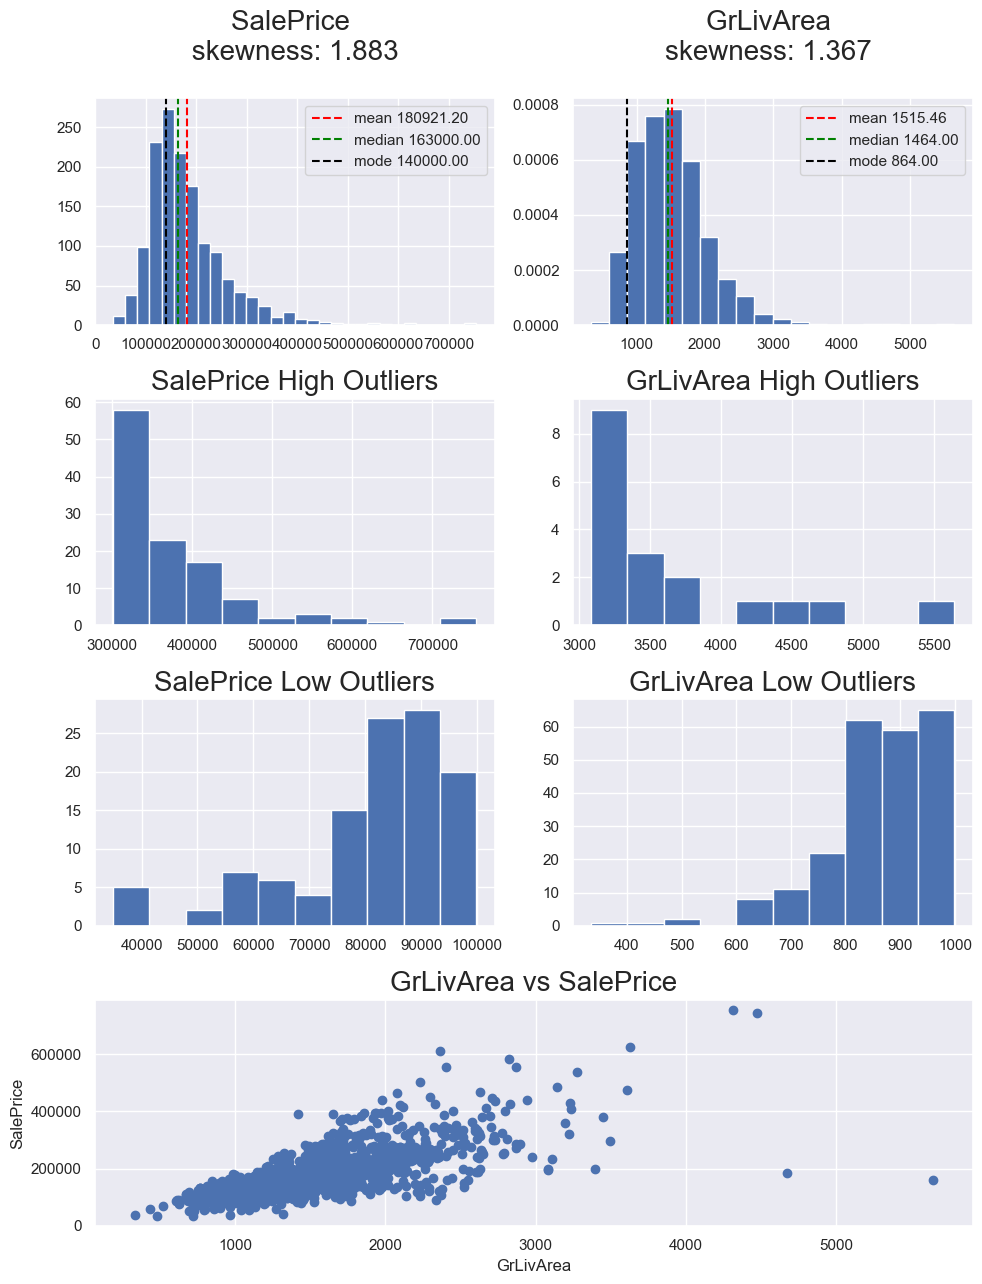

In [29]:
#checking some distributions
from statistics import mode, median

fig = plt.figure(tight_layout=True, figsize=(10,13))
gs = gridspec.GridSpec(4, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(train_data['SalePrice'], bins= 30)
ax1.set_title('SalePrice \n '
              +'skewness: %.3f \n'% train_data['SalePrice'].skew()
              #+'kurtosis: %.3f'%train_data['SalePrice'].kurtosis()
              ,size=20)
ax1.axvline(train_data['SalePrice'].mean(), 
            color='red', linestyle="--", label='mean %.2f' % train_data['SalePrice'].mean())
ax1.axvline(train_data['SalePrice'].median(), 
            color='green', linestyle="--", label='median %.2f' % median(train_data['SalePrice']))
ax1.axvline(mode(train_data['SalePrice'].values), 
            color='black', linestyle="--", label='mode %.2f' % mode(train_data['SalePrice']))
ax1.legend(loc='upper right', title_fontsize=100)

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(train_data['GrLivArea'], bins= 20, density=True)
ax2.set_title('GrLivArea \n'
              +'skewness: %.3f \n'% train_data['GrLivArea'].skew()
             # +'kurtosis: %.3f'%train_data['GrLivArea'].kurtosis()
              ,size=20             )
ax2.axvline(train_data['GrLivArea'].mean(), 
            color='red', linestyle="--", label='mean %.2f' % train_data['GrLivArea'].mean())
ax2.axvline(train_data['GrLivArea'].median(), 
            color='green', linestyle="--", label='median %.2f' % train_data['GrLivArea'].median())
ax2.axvline(mode(train_data['GrLivArea'].values), 
            color='black', linestyle="--", label='mode %.2f' % mode(train_data['GrLivArea'].values))
ax2.legend(loc='upper right', title_fontsize=100)

ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(train_data.loc[train_data['SalePrice']>300000, ['SalePrice']])
ax3.set_title('SalePrice High Outliers', size=20)

ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(train_data.loc[train_data['GrLivArea']>3000, ['GrLivArea']])
ax4.set_title('GrLivArea High Outliers', size=20)

ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(train_data.loc[train_data['SalePrice']<100000, ['SalePrice']])
ax5.set_title('SalePrice Low Outliers', size=20)

ax6 = fig.add_subplot(gs[2, 1])
ax6.hist(train_data.loc[train_data['GrLivArea']<1000, ['GrLivArea']])
ax6.set_title('GrLivArea Low Outliers', size=20)

ax7 = fig.add_subplot(gs[3, :])
ax7.scatter(train_data['GrLivArea'], train_data['SalePrice'])
ax7.set_title('GrLivArea vs SalePrice', size=20)
ax7.set_xlabel('GrLivArea')
ax7.set_ylabel('SalePrice')

fig.align_labels()
plt.show()

Both variables has some skewness, which could be dealt with log transformation.<br>

Accordingly to the plots above, in the steps of data preprocess i would eliminate those observations, where GrLivArea > 4000 (&& SalePrice <200000 ??)

Brief look at pierson correlation between all numeric variables.<br>
Shown multicollinearities should be dealt with later on.

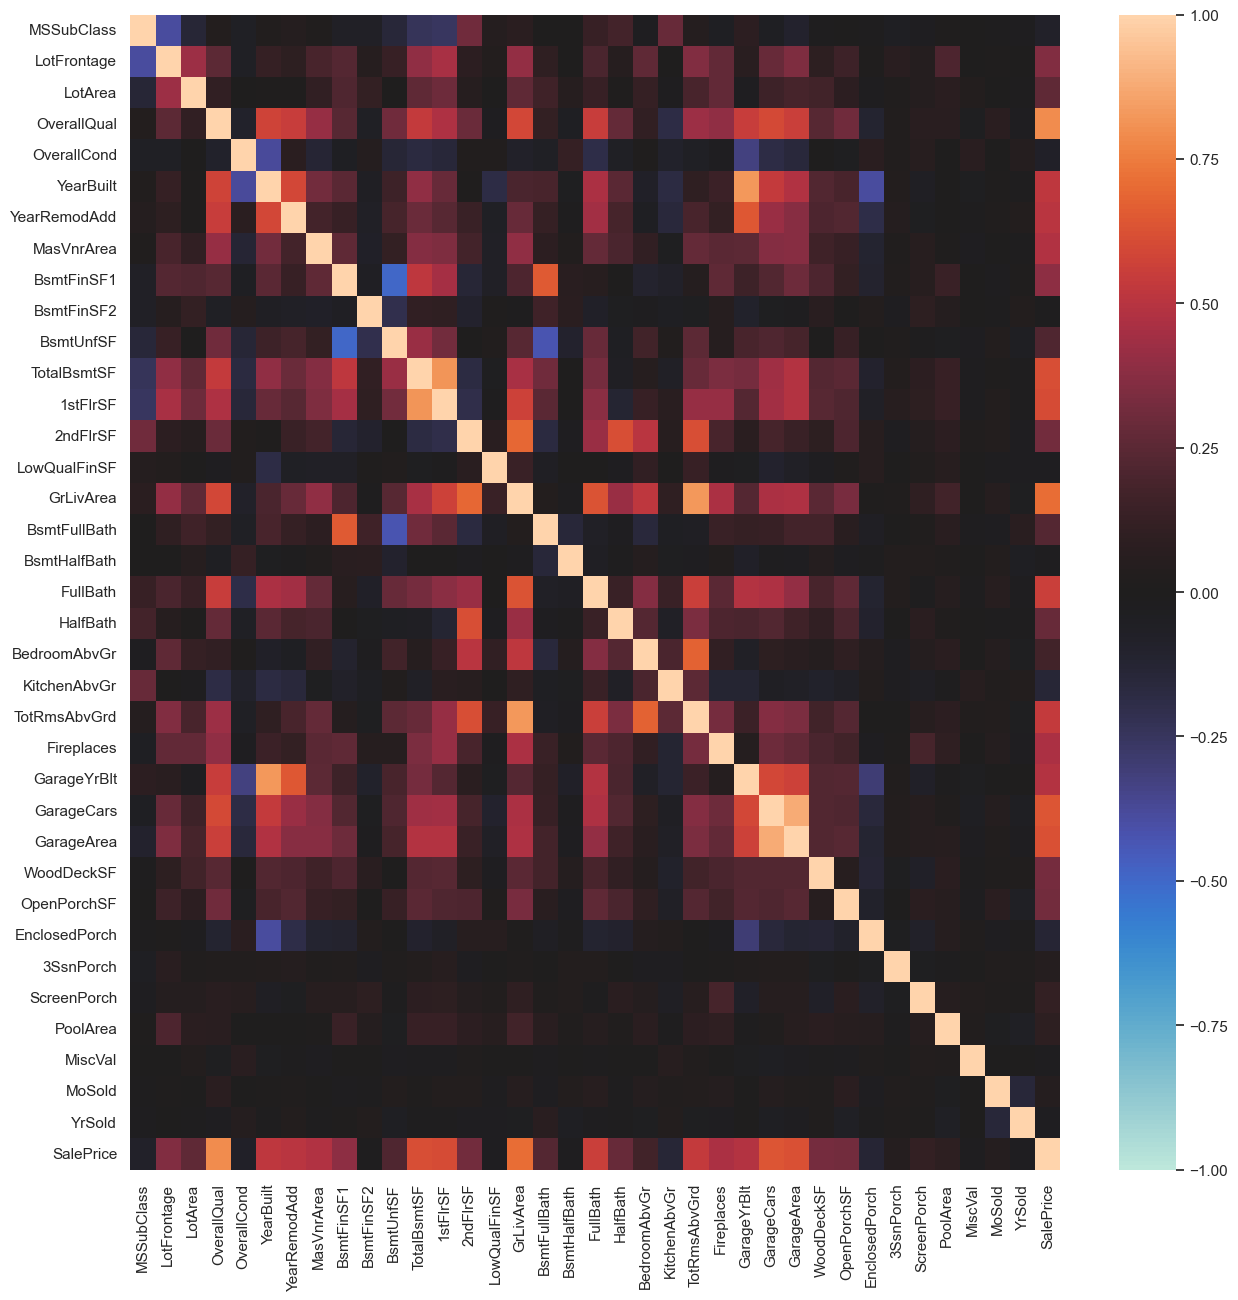

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.select_dtypes(include=['float64', 'int64']).drop('Id', axis=1).corr(),
            vmin=-1, vmax=1, center=0) 
plt.show()

- There must be some missing values as well

In [31]:
pd.DataFrame(
    train_data.isnull() \
    .sum().sort_values(ascending=False)
    , columns=['mv']).query('mv > 0')

,mv
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [32]:
#pd.DataFrame(test_data.isnull().sum().sort_values(ascending=False), columns=['mv']).query('mv > 0')
#pd.DataFrame(true_solutions_data.isnull().sum().sort_values(ascending=False), columns=['mv']).query('mv > 0')

##### This dataframe requires a significant amount of data preprocessing and manipulation, which is why I've chosen this database for my first Regression Analysis Project.

--------------------

## Data Preprocess

- duplicates
- missing values
- outliers
- skewness,kurtosis 



### Quick elimination of duplicates if any

In [33]:
print('Before the duplicate elimination the train_data has \t\t %i'%train_data.shape[0] + ' rows')
print('Before the duplicate elimination the test_data has \t\t %i'%test_data.shape[0] + ' rows')
print('Before the duplicate elimination the true_solutions_data has \t %i'%true_solutions_data.shape[0] + ' rows')

train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()
true_solutions_data= true_solutions_data.drop_duplicates()

print('\nAfter the duplicate elimination the train_data has \t\t %i'%train_data.shape[0] + ' rows')
print('After the duplicate elimination the test_data has \t\t %i'%test_data.shape[0] + ' rows')
print('After the duplicate elimination the true_solutions_data has \t %i'%true_solutions_data.shape[0] + ' rows')

Before the duplicate elimination the train_data has 		 1460 rows
Before the duplicate elimination the test_data has 		 1459 rows
Before the duplicate elimination the true_solutions_data has 	 1459 rows

After the duplicate elimination the train_data has 		 1460 rows
After the duplicate elimination the test_data has 		 1459 rows
After the duplicate elimination the true_solutions_data has 	 1459 rows


### Dealing with Missing values


In [34]:
# checking by dtype

train_data_num = train_data.select_dtypes(include=['float64', 'int64'])
train_data_cat = train_data.select_dtypes(include=['object'])

missing_num = pd.DataFrame()
missing_cat = pd.DataFrame()

missing_num['numb_mv'] = train_data_num.isnull().sum().sort_values(ascending=False)
missing_num['percent_mv %'] = ((missing_num['numb_mv'] / train_data_num.shape[0]) * 100).round(2)

missing_cat['numb_mv'] = train_data_cat.isnull().sum().sort_values(ascending=False)
missing_cat['percent_mv %'] = ((missing_cat['numb_mv'] / train_data_cat.shape[0]) * 100).round(2)


display_side_by_side(missing_num.query('numb_mv > 0'), 
                     missing_cat.query('numb_mv > 0'),
                     titles= ['Numeric Missings', 'Categoric Missings'])

print('\n\nThere are %i' % train_data_num.shape[1] +' numeric features '
     +'out of which %i' % len(missing_num.query('numb_mv > 0')) + ' has missing values')
print('There are %i' % train_data_cat.shape[1] +' categoric features '
     +'out of which %i' % len(missing_cat.query('numb_mv > 0')) + ' has missing values\n\n')

,numb_mv,percent_mv %
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
,numb_mv,percent_mv %
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageType,81,5.55




There are 38 numeric features out of which 3 has missing values
There are 43 categoric features out of which 16 has missing values




In [35]:
'''test_data missing value ^^'''

#missing_test = pd.DataFrame()

#missing_test['numb_mv'] = test_data.isnull().sum().sort_values(ascending=False)
#missing_test['percent_mv % '] = ((missing_test['numb_mv'] / test_data.shape[0]) * 100).round(2)
#missing_test.query('numb_mv > 0')


'test_data missing value ^^'

------------

- <i>Actual data preprocess is made on the main df's </i>

In [36]:
# to easily keep check on things 

def miss_check_shape_check(df_train, df_test):
    print('\n\nThe shape of train data: ', df_train.shape)
    print('The shape of test data: ', df_test.shape)
    
    miss_check = pd.DataFrame()
    miss_check['train_mv_numb'] = df_train.isnull().sum().sort_values(ascending=False)
    miss_check['train_mv_percent % '] = ((miss_check['train_mv_numb'] / df_train.shape[0]) * 100).round(2)
    miss_check['test_mv_numb'] = df_test.isnull().sum().sort_values(ascending=False)
    miss_check['test_mv_percent % '] = ((miss_check['test_mv_numb'] / df_train.shape[0]) * 100).round(2)
    
    return miss_check.query('train_mv_numb > 0 or test_mv_numb > 0')

In [37]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 81)
The shape of test data:  (1459, 80)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
PoolQC,1453,99.52,1456.0,99.73
MiscFeature,1406,96.30,1408.0,96.44
Alley,1369,93.77,1352.0,92.60
Fence,1179,80.75,1169.0,80.07
FireplaceQu,690,47.26,730.0,50.00
LotFrontage,259,17.74,227.0,15.55
GarageYrBlt,81,5.55,78.0,5.34
GarageCond,81,5.55,78.0,5.34
GarageType,81,5.55,76.0,5.21
GarageFinish,81,5.55,78.0,5.34


Due to high ratio in missing values both in test and train sets, i would drop columns that are above 80%. 
- <u>PoolQC</u> 	
- <u>MiscFeature</u> 	
- <u>Alley</u> 	
- <u>Fence</u> 

 

In [38]:
cols =['PoolQC', 'MiscFeature', 'Alley', 'Fence'] 
for col in cols: 
    train_data = train_data.drop(col, axis=1)

    test_data = test_data.drop(col, axis=1)

In [39]:
miss_check_shape_check(train_data, test_data).head(3)



The shape of train data:  (1460, 77)
The shape of test data:  (1459, 76)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
FireplaceQu,690,47.26,730.0,50.00
LotFrontage,259,17.74,227.0,15.55
GarageType,81,5.55,76.0,5.21


- <u>FireplaceQu</u>: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [40]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')

In [41]:
miss_check_shape_check(train_data, test_data).head(3)



The shape of train data:  (1460, 77)
The shape of test data:  (1459, 76)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
LotFrontage,259,17.74,227.0,15.55
GarageType,81,5.55,76.0,5.21
GarageYrBlt,81,5.55,78.0,5.34


- <u>LotFrontage</u>: Linear feet of street connected to property

! for this solution i feel the need for a **shout-out to Serigne** (kaggle user) <b>:</b> <br><br>
"LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood."

In [42]:
train_data['LotFrontage'].mean()

70.04995836802665

In [43]:
train_data['LotFrontage'] = train_data.groupby("Neighborhood")['LotFrontage'].transform(
                                                                                lambda x: x.fillna(x.median()))

test_data['LotFrontage'] = test_data.groupby("Neighborhood")['LotFrontage'].transform(
                                                                                lambda x: x.fillna(x.median()))

In [44]:
train_data['LotFrontage'].mean()

70.19965753424657

In [45]:
miss_check_shape_check(train_data, test_data).head(7)



The shape of train data:  (1460, 77)
The shape of test data:  (1459, 76)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
GarageType,81,5.55,76.0,5.21
GarageYrBlt,81,5.55,78.0,5.34
GarageFinish,81,5.55,78.0,5.34
GarageQual,81,5.55,78.0,5.34
GarageCond,81,5.55,78.0,5.34
BsmtExposure,38,2.60,44.0,3.01
BsmtFinType2,38,2.60,42.0,2.88


-------------------

- <b><u>All garage columns : </b></u><br><br>
according to the subset and descriptions below, it seems that NaN means that
the real estate has no garage at all

In [46]:
train_data.loc[train_data_num['GarageYrBlt'].isnull(), ['GarageYrBlt', 'GarageArea', 'GarageCars', 
                                                        'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']].head(5)

,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
39,NaN,0,0,NaN,NaN,NaN,NaN
48,NaN,0,0,NaN,NaN,NaN,NaN
78,NaN,0,0,NaN,NaN,NaN,NaN
88,NaN,0,0,NaN,NaN,NaN,NaN
89,NaN,0,0,NaN,NaN,NaN,NaN


Strategy: 
- from all Garage* columns create 1 categorical variable 'GarageScore' with some [0-no garage, 1-ok garage, 2-wow, garage, 3-omg garage, etc.] values
- convert all columns values to [0; x] numbers, then ~ <br>

<font size=4>$GarageScore = \frac{\sum{garage columns.values}}{len(columns)}$</font>

- ?- then make dummy with dropping 0 as 'reference point' -?
<br>

- <u>GarageType</u>: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- <u>GarageYrBlt</u>: Year garage was built<br>
		
- <u>GarageFinish</u>: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- <u>GarageCars</u>: Size of garage in car capacity<br>

- <u>GarageArea</u>: Size of garage in square feet<br>

- <u>GarageQual</u>: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- <u>GarageCond</u>: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [47]:
garage_data_train = train_data.loc[:, ['Id','GarageYrBlt', 'GarageArea', 'GarageCars', 
                                        'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'SalePrice']]

garage_data_test = test_data.loc[:, ['Id','GarageYrBlt', 'GarageArea', 'GarageCars', 
                                        'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']]

garage_data_train.describe(include="all" )

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish,SalePrice
count,1460.000000,1379.000000,1460.000000,1460.000000,1379,1379,1379,1379,1460.000000
unique,NaN,NaN,NaN,NaN,6,5,5,3,NaN
top,NaN,NaN,NaN,NaN,Attchd,TA,TA,Unf,NaN
freq,NaN,NaN,NaN,NaN,870,1326,1311,605,NaN
mean,730.500000,1978.506164,472.980137,1.767123,NaN,NaN,NaN,NaN,180921.195890
std,421.610009,24.689725,213.804841,0.747315,NaN,NaN,NaN,NaN,79442.502883
min,1.000000,1900.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,34900.000000
25%,365.750000,1961.000000,334.500000,1.000000,NaN,NaN,NaN,NaN,129975.000000
50%,730.500000,1980.000000,480.000000,2.000000,NaN,NaN,NaN,NaN,163000.000000
75%,1095.250000,2002.000000,576.000000,2.000000,NaN,NaN,NaN,NaN,214000.000000


In [48]:
#garage_data_test.describe(include="all")

In [49]:
garage_data_train.isnull().sum(), garage_data_train.dtypes

(Id               0
 GarageYrBlt     81
 GarageArea       0
 GarageCars       0
 GarageType      81
 GarageCond      81
 GarageQual      81
 GarageFinish    81
 SalePrice        0
 dtype: int64,
 Id                int64
 GarageYrBlt     float64
 GarageArea        int64
 GarageCars        int64
 GarageType       object
 GarageCond       object
 GarageQual       object
 GarageFinish     object
 SalePrice         int64
 dtype: object)

In [50]:
garage_data_test.isnull().sum(), garage_data_test.dtypes

(Id               0
 GarageYrBlt     78
 GarageArea       1
 GarageCars       1
 GarageType      76
 GarageCond      78
 GarageQual      78
 GarageFinish    78
 dtype: int64,
 Id                int64
 GarageYrBlt     float64
 GarageArea      float64
 GarageCars      float64
 GarageType       object
 GarageCond       object
 GarageQual       object
 GarageFinish     object
 dtype: object)

-----


- What's the deal with <u>'GarageArea'</u> and <u>'GarageCars'</u> <u>'GarageType'</u> in test data set

In [51]:
# need to check that 'GarageArea' and 'GarageCars'
display(garage_data_test[garage_data_test['GarageCars'].isnull()])
#display(garage_data_test[garage_data_test['GarageArea'].isnull()])
display(garage_data_test[garage_data_test['GarageYrBlt'].isnull()].head(3))
print('\n')

garage_data_test[garage_data_test['GarageYrBlt'].isnull()].query('Id == 2577')

#seems ok

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
1116,2577,NaN,NaN,NaN,Detchd,NaN,NaN,NaN


,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
53,1514,NaN,0.0,0.0,NaN,NaN,NaN,NaN
71,1532,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,1540,NaN,0.0,0.0,NaN,NaN,NaN,NaN


,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
1116,2577,NaN,NaN,NaN,Detchd,NaN,NaN,NaN


In [52]:
garage_data_test['GarageCars'] = garage_data_test['GarageCars'].fillna(0.0)
garage_data_test['GarageArea'] = garage_data_test['GarageArea'].fillna(0.0)

In [53]:
garage_data_test.isnull().sum()

Id               0
GarageYrBlt     78
GarageArea       0
GarageCars       0
GarageType      76
GarageCond      78
GarageQual      78
GarageFinish    78
dtype: int64

In [54]:
# ^^ 78 - 76 --> Why the difference?
# Whats up with that 2 GarageType that have some value?

garage_data_test[garage_data_test['GarageYrBlt'].isnull()].sort_values(by='GarageType').head(3)

# for simplicity I would consider this two as if they had no garage (less change needed)

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
666,2127,NaN,360.0,1.0,Detchd,NaN,NaN,NaN
1116,2577,NaN,0.0,0.0,Detchd,NaN,NaN,NaN
53,1514,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [55]:
garage_data_test[garage_data_test['GarageYrBlt'].isnull()].query('Id == [2577,2127]')

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
666,2127,NaN,360.0,1.0,Detchd,NaN,NaN,NaN
1116,2577,NaN,0.0,0.0,Detchd,NaN,NaN,NaN


In [56]:
# to be no garage
#garage_data_test.loc[garage_data_test['Id']==2127, ['GarageCars', 'GarageArea']] = 0.0
## garage_data_test.loc[garage_data_test['Id']==(2127 and 2577), ['GarageType']] = np.nan

garage_data_test.at[666, 'GarageArea'] = 0.0
garage_data_test.at[666, 'GarageCars'] = 0.0
garage_data_test.at[666, 'GarageType'] = np.nan
garage_data_test.at[1116, 'GarageType'] = np.nan

In [57]:
miss_check_shape_check(garage_data_train, garage_data_test)



The shape of train data:  (1460, 9)
The shape of test data:  (1459, 8)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
GarageYrBlt,81,5.55,78.0,5.34
GarageType,81,5.55,78.0,5.34
GarageCond,81,5.55,78.0,5.34
GarageQual,81,5.55,78.0,5.34
GarageFinish,81,5.55,78.0,5.34


garage_data_test is preapared as well

----------

In [58]:
# garage_data_train.drop('Id', axis=1).hist()

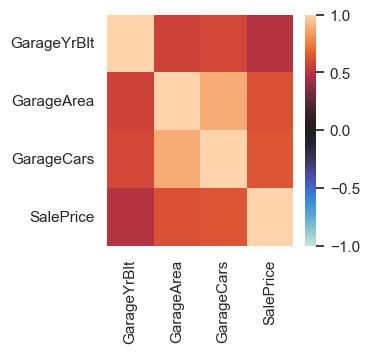

In [59]:
plt.figure(figsize=(3,3))
sns.heatmap(garage_data_train.drop('Id', axis=1)
            .select_dtypes(include=['float64', 'int64'])
            .corr(), 
            #annot=True, fmt=".2f", 
            vmin=-1, vmax=1, center=0) 
plt.show()

In [60]:
no_garage_data_train = garage_data_train.query('GarageCars<1')
no_garage_data_test = garage_data_test.query('GarageCars<1') #cause i'm prepared garage_data_test

In [61]:
display('no_garage_data_train: ',no_garage_data_train.shape)
display(no_garage_data_train.head(3))
display('no_garage_data_test: ',no_garage_data_test.shape)
display(no_garage_data_test.head(3))

'no_garage_data_train: '

(81, 9)

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish,SalePrice
39,40,NaN,0,0,NaN,NaN,NaN,NaN,82000
48,49,NaN,0,0,NaN,NaN,NaN,NaN,113000
78,79,NaN,0,0,NaN,NaN,NaN,NaN,136500


'no_garage_data_test: '

(78, 8)

,Id,GarageYrBlt,GarageArea,GarageCars,GarageType,GarageCond,GarageQual,GarageFinish
53,1514,NaN,0.0,0.0,NaN,NaN,NaN,NaN
71,1532,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,1540,NaN,0.0,0.0,NaN,NaN,NaN,NaN


     'GarageScore'         [0-no garage, 1-ok garage, 2-wow garage, 3-omg garage, etc.] 

- no_garage_data with 'GarageScore' (both in train & test sets)

In [62]:
import warnings
warnings.filterwarnings("ignore")

no_garage_data_train['GarageScore'] = 0
no_garage_data_test['GarageScore'] = 0

no_garage_data_train = no_garage_data_train.loc[:, ['Id', 'GarageScore']].copy()
no_garage_data_test = no_garage_data_test.loc[:, ['Id', 'GarageScore']].copy()

# display(no_garage_data_train.head(2))
# display(no_garage_data_test.head(2))

In [63]:
'''
display_side_by_side(
    display_side_by_side(pd.DataFrame(garage_data_train.isnull().sum(), columns=['missing']), 
                     pd.DataFrame(garage_data_test.isnull().sum(), columns=['missing']),
                     titles = ['garage_data_train missing', 
                               'garage_data_test missing']
                        ),
    display_side_by_side(no_garage_data_train.head(3), 
                         no_garage_data_test.head(3),
                     titles = ['shape of no_garage_data_train: ' + str(no_garage_data_train.shape), 
                               'shape of no_garage_data_test: ' + str(no_garage_data_test.shape)]
                        ),
    )
'''

"\ndisplay_side_by_side(\n    display_side_by_side(pd.DataFrame(garage_data_train.isnull().sum(), columns=['missing']), \n                     pd.DataFrame(garage_data_test.isnull().sum(), columns=['missing']),\n                     titles = ['garage_data_train missing', \n                               'garage_data_test missing']\n                        ),\n    display_side_by_side(no_garage_data_train.head(3), \n                         no_garage_data_test.head(3),\n                     titles = ['shape of no_garage_data_train: ' + str(no_garage_data_train.shape), \n                               'shape of no_garage_data_test: ' + str(no_garage_data_test.shape)]\n                        ),\n    )\n"

- yes_garage_data with 'GarageScore' (train & test)

In [64]:
yes_garage_data_train = garage_data_train.query('GarageCars>0')
yes_garage_data_test = garage_data_test.query('GarageCars>0')

#yes_garage_data_train.isnull().sum()
#yes_garage_data_test.isnull().sum()

In [65]:
# yes_garage_data_train.GarageYrBlt.hist(bins=len(yes_garage_data_train.GarageYrBlt.unique()))
# yes_garage_data_train.GarageArea.hist(bins=len(yes_garage_data_train.GarageArea.unique()))
# yes_garage_data_train.GarageType.hist(bins=len(yes_garage_data_train.GarageType.unique()))
# yes_garage_data_train.GarageCond.hist(bins=len(yes_garage_data_train.GarageCond.unique()))
# yes_garage_data_train.GarageQual.hist(bins=len(yes_garage_data_train.GarageQual.unique()))
# yes_garage_data_train.GarageFinish.hist(bins=len(yes_garage_data_train.GarageFinish.unique()))

Rules for changing Garage * columns

In [66]:
def YrBlt_modif(GarageYrBlt):
    if 1900<GarageYrBlt<1940:
        return 1
    elif 1940<=GarageYrBlt<1960:
        return 2
    elif 1960<=GarageYrBlt<1980:
        return 3
    elif 1980<=GarageYrBlt<2000:
        return 4
    else:
        return 5

def Area_modif(GarageArea):
    if 0<GarageArea<280:
        return 1
    elif 280<=GarageArea<560:
        return 2
    elif 560<=GarageArea<840:
        return 3
    elif 840<=GarageArea<1120:
        return 4
    else:
        return 5

#def Cars_modif()

def Type_modif(GarageType):
    if GarageType =='Attchd':
        return 1
    elif GarageType =='Detchd':
        return 2
    elif GarageType =='BuiltIn':
        return 3
    elif GarageType =='Basment':
        return 4
    elif GarageType =='CarPort':
        return 5
    else: 
        return 6

def Cond_modif(GarageCond):
    if GarageCond =='Po':
        return 1
    elif GarageCond =='Fa':
        return 2
    elif GarageCond =='TA':
        return 3
    elif GarageCond =='Gd':
        return 4
    elif GarageCond =='Ex':
        return 4
    else: 
        return 6

def Qual_modif(GarageQual):
    if GarageQual=='Po':
        return 1
    elif GarageQual=='Fa':
        return 2
    elif GarageQual=='TA':
        return 3
    elif GarageQual=='Gd':
        return 4
    elif GarageQual =='Ex':
        return 4
    else: 
        return 6
                
def Finish_modif(GarageFinish):
    if GarageFinish =='Unf': #punishable?
        return -2
    elif GarageFinish =='RFn': #punishable?
        return -1
    else:
        return 1
 


In [67]:
import warnings
warnings.filterwarnings("ignore")

# applying rules to train set

yes_garage_data_train['GarageYrBlt'] = yes_garage_data_train['GarageYrBlt'].apply(YrBlt_modif)
yes_garage_data_train['GarageArea'] = yes_garage_data_train['GarageArea'].apply(Area_modif)
yes_garage_data_train['GarageType'] = yes_garage_data_train['GarageType'].apply(Type_modif)
yes_garage_data_train['GarageCond'] = yes_garage_data_train['GarageCond'].apply(Cond_modif)
yes_garage_data_train['GarageQual'] = yes_garage_data_train['GarageQual'].apply(Qual_modif)
yes_garage_data_train['GarageFinish'] = yes_garage_data_train['GarageFinish'].apply(Finish_modif)

yes_garage_data_train['GarageScore'] = (yes_garage_data_train['GarageYrBlt'] + yes_garage_data_train['GarageArea'] 
                                + yes_garage_data_train['GarageType'] + yes_garage_data_train['GarageCars']
                                + yes_garage_data_train['GarageCond'] + yes_garage_data_train['GarageQual'] 
                                + yes_garage_data_train['GarageFinish']) /len(yes_garage_data_train.columns[1:-2])

# applying rules to test set

yes_garage_data_test['GarageYrBlt'] = yes_garage_data_test['GarageYrBlt'].apply(YrBlt_modif)
yes_garage_data_test['GarageArea'] = yes_garage_data_test['GarageArea'].apply(Area_modif)
yes_garage_data_test['GarageType'] = yes_garage_data_test['GarageType'].apply(Type_modif)
yes_garage_data_test['GarageCond'] = yes_garage_data_test['GarageCond'].apply(Cond_modif)
yes_garage_data_test['GarageQual'] = yes_garage_data_test['GarageQual'].apply(Qual_modif)
yes_garage_data_test['GarageFinish'] = yes_garage_data_test['GarageFinish'].apply(Finish_modif)

yes_garage_data_test['GarageScore'] = (yes_garage_data_test['GarageYrBlt'] + yes_garage_data_test['GarageArea'] 
                                + yes_garage_data_test['GarageType'] + yes_garage_data_test['GarageCars']
                                + yes_garage_data_test['GarageCond'] + yes_garage_data_test['GarageQual'] 
                                + yes_garage_data_test['GarageFinish']) /len(yes_garage_data_test.columns[1:-1])

In [68]:
#no_garage_data_train.head(2)

In [69]:
#keeping only Id and GarageScore columns for yes garage sets as well

yes_garage_data_train = yes_garage_data_train.drop(yes_garage_data_train.columns.values[1:-1], axis=1)

yes_garage_data_test = yes_garage_data_test.drop(yes_garage_data_test.columns.values[1:-1], axis=1)

#merging no and yes garage sets
new_garage_train = pd.concat([no_garage_data_train, yes_garage_data_train]).sort_values(by='Id')

new_garage_test = pd.concat([no_garage_data_test, yes_garage_data_test]).sort_values(by='Id')

In [70]:
#new_garage_train
#new_garage_test

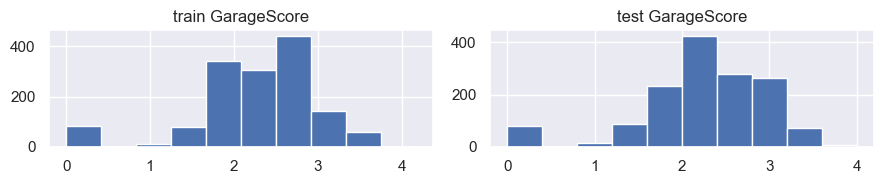

In [71]:
# checkink the new datas 

#visualize distribution of new column in train
fig = plt.figure(tight_layout=True, figsize=(9, 2))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(new_garage_train.GarageScore
             #.where(new_garage_train.GarageScore>0)
             , bins = 10)
ax1.set_title('train GarageScore')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(new_garage_test.GarageScore
         # .where(new_garage_train.GarageScore>0.8)
             , bins = 10)
ax2.set_title('test GarageScore')
plt.show()

dropping all garage columns from train_data and test_data, and adding ^^obtained^^ 'GarageScore'

In [72]:
miss_check_shape_check(train_data, test_data).head(3)



The shape of train data:  (1460, 77)
The shape of test data:  (1459, 76)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
GarageType,81,5.55,76.0,5.21
GarageYrBlt,81,5.55,78.0,5.34
GarageFinish,81,5.55,78.0,5.34


In [73]:
train_data = train_data.drop(['GarageYrBlt', 'GarageArea', 'GarageCars',
                     'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish'], axis=1)

test_data = test_data.drop(['GarageYrBlt', 'GarageArea', 'GarageCars',
                     'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish'], axis=1)

# adding GarageScore 
train_data['GarageScore'] = new_garage_train.drop('Id', axis=1).values
test_data['GarageScore'] = new_garage_test.drop('Id', axis=1).values

In [74]:
 #dropped 7 garage col, and added a new
miss_check_shape_check(train_data, test_data).head(3)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
BsmtFinType2,38,2.60,42.0,2.88
BsmtExposure,38,2.60,44.0,3.01
BsmtCond,37,2.53,45.0,3.08


--------

In [75]:
'''Checking test_data missing numerics'''
# get_columns_by_dtype(test_data)

'Checking test_data missing numerics'

In [76]:
# numerics = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
#          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
#          'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
#          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
#          'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageScore'] 
# missings = ['BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType','MasVnrArea','Electrical',
#             'BsmtFullBath','BsmtHalfBath','KitchenQual','SaleType','Functional','BsmtFinSF2','MSZoning','Utilities',
#             'TotalBsmtSF','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtUnfSF']
# 
# 
# list(set(numerics).intersection(missing))

- <b><u>MasVnr*: </b></u><br><br>
<br>
Before dealing with basement info in another longer section,<br>
lets check the ~"last" numeric(s) <i>(at this stage)</i> from  train <br>
and its corresponding categoric value
<br>


p.s.: was longer than expected

In [77]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("MasVnr")')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
MasVnrType,8,0.55,16.0,1.10
MasVnrArea,8,0.55,15.0,1.03


In [78]:
display_side_by_side(
    train_data.loc[train_data['MasVnrArea'].isnull(), ['MasVnrType','MasVnrArea']],
    test_data.loc[test_data['MasVnrArea'].isnull(), ['MasVnrType','MasVnrArea']],
    titles=['train', 'test'])

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
,MasVnrType,MasVnrArea
231,NaN,NaN


<ul>
    <li><u>MasVnrArea</u>: Masonry veneer area in square feet</li>
    
</ul>

For the reason<font size="3"><b>*</b></font> that 
- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None *
       Stone	Stone

In [79]:
#and because*
#train_data['MasVnrArea'].describe()

In [80]:
#shape check
display(train_data[['MasVnrArea']].query('MasVnrArea < 1').shape[0])
display(test_data[['MasVnrArea']].query('MasVnrArea < 1').shape[0])

861

877

In [81]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0.0)
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0.0)

In [82]:
#shape check
display(train_data[['MasVnrArea']].query('MasVnrArea < 1').shape[0])
display(test_data[['MasVnrArea']].query('MasVnrArea < 1').shape[0])

869

892

- <u>MasVnrType</u>: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None *
       Stone	Stone

In [83]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("MasVnr")')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
MasVnrType,8,0.55,16.0,1.1


In [84]:
display_side_by_side(
    train_data.loc[train_data['MasVnrType'].isnull(), ['MasVnrType','MasVnrArea']],
    test_data.loc[test_data['MasVnrType'].isnull(), ['MasVnrType','MasVnrArea']],
    titles=['train', 'test'])

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0
,MasVnrType,MasVnrArea
231,NaN,0.0


^^ check index = 1150 ^^

In [85]:
#train_data.loc[train_data[['MasVnrType']].values == 'None', ['MasVnrType','MasVnrArea']]

In [86]:
display_side_by_side(
    train_data.loc[
        train_data[['MasVnrType']].values == 'None', 
        ['MasVnrType','MasVnrArea']] \
        .query('MasVnrArea != 0.0'),
    test_data.loc[
        test_data[['MasVnrType']].values == 'None', 
        ['MasVnrType','MasVnrArea']] \
        .query('MasVnrArea != 0.0'),
    titles=['train','test'])

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0
,MasVnrType,MasVnrArea
209,None,285.0
992,None,1.0


In [87]:
train_data.at[773, 'MasVnrArea'] = 0.0
train_data.at[1230, 'MasVnrArea'] = 0.0

test_data.at[992, 'MasVnrArea'] = 0.0

In [88]:
display_side_by_side(
    train_data.loc[
        train_data[['MasVnrType']].values == 'None', 
        ['MasVnrType','MasVnrArea']] \
        .query('MasVnrArea != 0.0'),
    test_data.loc[
        test_data[['MasVnrType']].values == 'None', 
        ['MasVnrType','MasVnrArea']] \
        .query('MasVnrArea != 0.0'),
    titles=['train','test'])

,MasVnrType,MasVnrArea
624,None,288.0
1300,None,344.0
1334,None,312.0
,MasVnrType,MasVnrArea
209,None,285.0


In [89]:
test_data.loc[
        test_data[['MasVnrType']].values == 'Stone', 
       ['MasVnrType','MasVnrArea']] \
     .query('MasVnrArea != 0.0')['MasVnrArea'].describe()

count     121.000000
mean      239.809917
std       188.868178
min        16.000000
25%       122.000000
50%       198.000000
75%       300.000000
max      1224.000000
Name: MasVnrArea, dtype: float64

 - BrkCmn    Brick Common - train-75%: 381 test-75%: 155
 - BrkFace    Brick Face -  train-75%: 336 test-75%: 355
 - CBlock    Cinder Block - there's no entry for this cat value
 - None    None *
 - Stone    Stone - train-75%: 297 test-75%: 300

In [90]:
train_data.at[624, 'MasVnrType'] = 'Stone'
train_data.at[1300, 'MasVnrType'] = 'BrkCmn'
train_data.at[1334, 'MasVnrType'] = 'BrkFace'

test_data.at[1150, 'MasVnrType'] = 'BrkCmn' # ^^check index = 1150 ^^ In[85]
test_data.at[209, 'MasVnrType'] = 'Stone'

In [91]:
display_side_by_side(
    train_data.loc[train_data['MasVnrType'].isnull(), ['MasVnrType','MasVnrArea']],
    test_data.loc[test_data['MasVnrType'].isnull(), ['MasVnrType','MasVnrArea']],
    titles=['train', 'test'])

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0
,MasVnrType,MasVnrArea
231,NaN,0.0


In [92]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("MasVnr")')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
MasVnrType,8,0.55,15.0,1.03


In [93]:
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')

test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

In [94]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("MasVnr")')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %


In [95]:
#train_data['MasVnrType'].hist()
#test_data['MasVnrType'].hist()

In [96]:
#train_data.loc[train_data['MasVnrArea'] < 10, ['MasVnrArea', 'MasVnrType']].sort_values(ascending=False, by='MasVnrArea')
#test_data.loc[test_data['MasVnrArea'] < 10, ['MasVnrArea', 'MasVnrType']].sort_values(ascending=False, by='MasVnrArea')

-----------

- <b><u>All basement columns : </b></u><br><br>


In [97]:
train_data.loc[:, train_data.columns.str.contains('Bsmt')].head(1)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0


- TotalBsmtSF: Total square feet of basement area
- BsmtUnfSF: Unfinished square feet of basement area


- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- BsmtFinSF2: Type 2 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
       
 

- BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
- BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement


- BsmtHalfBath: Basement half bathrooms
- BsmtFullBath: Basement full bathrooms

In [98]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt")')




The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
BsmtFinType2,38,2.60,42.0,2.88
BsmtExposure,38,2.60,44.0,3.01
BsmtQual,37,2.53,44.0,3.01
BsmtFinType1,37,2.53,42.0,2.88
BsmtCond,37,2.53,45.0,3.08
BsmtHalfBath,0,0.00,2.0,0.14
BsmtFullBath,0,0.00,2.0,0.14
BsmtFinSF2,0,0.00,1.0,0.07
TotalBsmtSF,0,0.00,1.0,0.07
BsmtUnfSF,0,0.00,1.0,0.07


In [99]:
#train_data[miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt")').index].dtypes
#test_data[miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt")').index].dtypes

In [100]:
#variables = len(train_data.loc[:, train_data.columns.str.contains('Bsmt')].select_dtypes('O').columns)
#to_show_row = 3
#num_of_rows = (variables // to_show_row) + (variables % to_show_row > 0)

#fig, axes = plt.subplots(num_of_rows, to_show_row, figsize=(15, 5*num_of_rows))

#for i, column in enumerate(train_data.loc[:, train_data.columns.str.contains('Bsmt')].select_dtypes('O').columns):
#    row = i // to_show_row
#    col = i % to_show_row
#
#    ax = axes[row, col] 
#    sns.countplot(x=column, data=train_data_cat, ax=ax)
#    ax.set_title(column)
#    ax.set_xlabel('')
#    ax.set_ylabel('Count')
#
#plt.tight_layout()
#plt.show()

<br>

- There are different mv inconsitencies in the the 2 dfs --> checking them separately

<br>

**Train** - BsmtFinType2

In [101]:
#train_data.loc[
#    train_data['TotalBsmtSF'] < 1., 
#    train_data.columns.str.contains('Bsmt')
#] \
#.shape # (37,11)


In [102]:
#get_columns_by_dtype(train_data.loc[:, train_data.columns.str.contains('Bsmt')])

In [103]:
train_data.loc[
    train_data['BsmtFinType2'].isnull(), 
    train_data.columns.str.contains('Bsmt')
] \
.sort_values(ascending=False, by='BsmtFinSF1') \
.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
1048,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
894,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
897,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


^^ index 332 ˇˇ

In [104]:
#train_data.loc[
#    train_data['BsmtFinType2'] == 'Unf', 
#   train_data.columns.str.contains('Bsmt')
#                ] [['BsmtFinSF2']].max() # so it shouldn't be unfinsihed ?

#train_data.loc[
#    train_data['BsmtFinSF2'] != 0,
#   train_data.columns.str.contains('Bsmt')
#                ] \
##[['BsmtFinType2']].describe() # so be it Rec
##[['BsmtFinSF2', 'BsmtFinType2']].query('BsmtFinType2 == "Rec"').describe(include="all") # so be it REC

In [105]:
train_data.at[332, 'BsmtFinType2'] = 'Rec'

<br>

**Train** - BsmtExposure

    BsmtExposure: Refers to walkout or garden level walls

     Gd    Good Exposure
     Av    Average Exposure (split levels or foyers typically score average or above)    
     Mn    Mimimum Exposure
     No    No Exposure
     NA    No Basement --> Not the case here

In [106]:
train_data.loc[
    train_data['BsmtExposure'].isnull(), 
    train_data.columns.str.contains('Bsmt')
].query('TotalBsmtSF > 0')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


In [107]:
train_data.loc[
    train_data['BsmtQual'] =='Gd',
   train_data.columns.str.contains('Bsmt')
              ] [['BsmtExposure']].describe() # so be it 'No'

,BsmtExposure
count,617
unique,4
top,No
freq,359


In [108]:
train_data.at[948, 'BsmtExposure'] = 'No'

<br>

**Test** - BsmtCond

In [109]:
test_data.loc[
    test_data['BsmtCond'].isnull(), 
    test_data.columns.str.contains('Bsmt')
].query('TotalBsmtSF > 0')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


^^ Check index 580, 725, 1064 ˇˇ

In [110]:
#test_data.loc[
#   test_data['BsmtQual'] =='Gd', # 'TA'
#   test_data.columns.str.contains('Bsmt')
#              ] [['BsmtCond']].describe() # so be TA

#test_data.loc[
#   test_data['BsmtFinType2'] =='Rec', # 'Unf'
#   test_data.columns.str.contains('Bsmt')
#              ] [['BsmtCond']].describe() # so be TA

In [111]:
test_data.at[580, 'BsmtCond'] = 'TA'
test_data.at[725, 'BsmtCond'] = 'TA'
test_data.at[1064, 'BsmtCond'] = 'TA'

<br>

**Test** - BsmtQual

In [112]:
test_data.loc[
    test_data['BsmtQual'].isnull(), 
    test_data.columns.str.contains('Bsmt')
].query('TotalBsmtSF > 0')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [113]:
#test_data.loc[
#    test_data['TotalBsmtSF'] !=0, 
#    test_data.columns.str.contains('Bsmt')
#].query('BsmtFinType1 == "Unf"')['BsmtQual'].describe() # so be it 'TA'

In [114]:
test_data.at[757, 'BsmtQual'] = 'TA'
test_data.at[758, 'BsmtQual'] = 'TA'

<br>

**Test** - BsmtExposure

In [115]:
test_data.loc[
    test_data['BsmtExposure'].isnull(), 
    test_data.columns.str.contains('Bsmt')
].query('TotalBsmtSF > 0')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [116]:
#test_data.loc[
#    test_data['TotalBsmtSF'] !=0, 
#    test_data.columns.str.contains('Bsmt')
#].query('BsmtFinType1 == "Unf" and BsmtQual == "Gd"')['BsmtExposure'].describe() # so be it 'No#'

In [117]:
test_data.at[27, 'BsmtExposure'] = 'No'
test_data.at[888, 'BsmtExposure'] = 'No'

In [118]:
# miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt")')

<br>

**Test** - BsmtCond, BsmtHalfBath, BsmtFullBath, BsmtFinSF2,BsmtTotalSF, BsmtUnfSF, BsmtFinSF1

In [119]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt") and test_mv_numb <42')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
BsmtHalfBath,0,0.0,2.0,0.14
BsmtFullBath,0,0.0,2.0,0.14
BsmtFinSF2,0,0.0,1.0,0.07
TotalBsmtSF,0,0.0,1.0,0.07
BsmtUnfSF,0,0.0,1.0,0.07
BsmtFinSF1,0,0.0,1.0,0.07


In [120]:
test_data.loc[
    test_data['BsmtQual'].isnull(), 
    test_data.columns.str.contains('Bsmt')
][
    miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt") and test_mv_numb <42').index] \
.head(18).tail(3)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1
660,NaN,NaN,NaN,NaN,NaN,NaN
662,0.0,0.0,0.0,0.0,0.0,0.0
728,NaN,NaN,0.0,0.0,0.0,0.0


In [121]:
for col in ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1']:
    test_data.at[660, col] = 0.0
    test_data.at[728, col] = 0.0

<br>

**Train & Test** - Lets fill in what's left <u>Bsmt</u>*

In [122]:
miss_check_shape_check(train_data, test_data).query('index.str.contains("Bsmt")')



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
BsmtQual,37,2.53,42.0,2.88
BsmtFinType2,37,2.53,42.0,2.88
BsmtFinType1,37,2.53,42.0,2.88
BsmtExposure,37,2.53,42.0,2.88
BsmtCond,37,2.53,42.0,2.88


In [123]:
# train_data.loc[
#     train_data['BsmtQual'].isnull(), 
#     train_data.columns.str.contains('Bsmt')
# ] #seems ok lets fill in

# test_data.loc[
#     test_data['BsmtQual'].isnull(), 
#     test_data.columns.str.contains('Bsmt')
# ] #seems ok lets fill in

In [124]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NA')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')

test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')


In [125]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
Electrical,1,0.07,0.0,0.00
KitchenQual,0,0.00,1.0,0.07
Functional,0,0.00,2.0,0.14
SaleType,0,0.00,1.0,0.07
Utilities,0,0.00,2.0,0.14
MSZoning,0,0.00,4.0,0.27
Exterior2nd,0,0.00,1.0,0.07
Exterior1st,0,0.00,1.0,0.07


----------

- Remaining missing values

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
      

In [126]:
train_data.loc[
   train_data.Electrical.isnull(),
    
]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageScore
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500,3.166667


In [127]:
#train_data.loc[
#   train_data.Neighborhood == "Timber",
#    ['Electrical']
#].describe()

In [128]:
train_data.at[1379, 'Electrical'] = "SBrkr"

In [129]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
KitchenQual,0,0.0,1.0,0.07
Functional,0,0.0,2.0,0.14
SaleType,0,0.0,1.0,0.07
Utilities,0,0.0,2.0,0.14
MSZoning,0,0.0,4.0,0.27
Exterior2nd,0,0.0,1.0,0.07
Exterior1st,0,0.0,1.0,0.07


<br><br>

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [130]:
test_data.loc[
  test_data.KitchenQual.isnull(),
   ['Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'OverallQual','ExterQual', 'ExterCond', 
    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional'] 
]

,Condition1,Condition2,BldgType,HouseStyle,OverallQual,ExterQual,ExterCond,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional
95,Norm,Norm,1Fam,1.5Fin,5,TA,TA,1,NaN,6,Mod


In [131]:
#test_data.loc[
#  :,
#   ['Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
#    'OverallQual','ExterQual', 'ExterCond', 
#    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd'] 
#].query('KitchenAbvGr < 2 and OverallQual < 6').describe(include="all") # so be TA

In [132]:
test_data.at[95, 'KitchenQual'] = "TA"

<br><br>

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [133]:
test_data.loc[
  test_data.Functional.isnull(),
   
]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
756,2217,20,NaN,80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,N,0,0,0,0,0,0,0,2,2008,WD,Abnorml,1.333333
1013,2474,50,RM,60.0,10320,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,N,14,211,0,0,84,0,0,9,2007,COD,Abnorml,1.333333


In [134]:
#test_data.loc[
#  test_data.SaleCondition == "Abnorml",
#   ['Functional']
#].describe() # so be Typ 

In [135]:
test_data.at[756, 'Functional'] = "Typ"
test_data.at[1013, 'Functional'] = "Typ"

<br><br>
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [136]:
test_data.loc[
  test_data.SaleType.isnull(),
   
]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
1029,2490,20,RL,85.0,13770,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Y,0,0,0,0,0,0,0,10,2007,NaN,Normal,1.666667


In [137]:
# test_data['SaleType'].describe() # so be it WD

In [138]:
test_data.at[1029, 'SaleType'] = "WD"

In [139]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
Utilities,0,0.0,2.0,0.14
MSZoning,0,0.0,4.0,0.27
Exterior2nd,0,0.0,1.0,0.07
Exterior1st,0,0.0,1.0,0.07


<br><br>

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [140]:
test_data.loc[
  test_data.Utilities.isnull(),
   ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
455,1916,30,NaN,109.0,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal,2.000000
485,1946,20,RL,63.0,31220,Pave,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Y,0,0,144,0,0,0,750,5,2008,WD,Normal,1.833333


In [141]:
#test_data.loc[ # lf value for index 455
#  test_data.Neighborhood == "IDOTRR",
#    ['Utilities']
#].describe() # so be AllPub 

#test_data.loc[ # lf value for index 485
#  test_data.Neighborhood == "Gilbert",
#    ['Utilities']
#].describe() # so be AllPub

In [142]:
test_data.at[455, 'Utilities'] = "AllPub"
test_data.at[485, 'Utilities'] = "AllPub"

<br><br>

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [143]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %
MSZoning,0,0.0,4.0,0.27
Exterior2nd,0,0.0,1.0,0.07
Exterior1st,0,0.0,1.0,0.07


<br><br>

- <u>MSZoning</u>: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [144]:
test_data.loc[
  test_data.MSZoning.isnull(),
   ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
455,1916,30,NaN,109.0,21780,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal,2.000000
756,2217,20,NaN,80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Typ,0,None,N,0,0,0,0,0,0,0,2,2008,WD,Abnorml,1.333333
790,2251,70,NaN,60.0,56600,Pave,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,N,0,0,0,0,0,0,0,1,2008,WD,Normal,2.166667
1444,2905,20,NaN,125.0,31250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,N,0,0,135,0,0,0,0,5,2006,WD,Normal,1.333333


In [145]:
# trying to identify columns that could point toward solution for mvs
#test_data \
#.query('MSSubClass == 30 and LotArea < 15000') \
#.query('Neighborhood == "IDOTRR"') \
#.sort_values(ascending=False, by="LotArea") #maybe "C all"

##test_data.loc[test_data['MSZoning'] == "C (all)"] ##did not fing any capable indicators

In [146]:
test_data['MSZoning'].describe() # gonna fill up with most frequent (~80%)

count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object

In [147]:
# restore true value as in description file

test_data = test_data.replace({'MSZoning': "C (all)"}, "C") 

In [148]:
test_data.at[455, 'MSZoning'] = "RL"
test_data.at[756, 'MSZoning'] = "RL"
test_data.at[790, 'MSZoning'] = "RL"
test_data.at[1444, 'MSZoning'] = "RL"

<div style ="display: flex">
<br>
    
<u>**Exterior1st**</u>: <br>
    Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

<u>**Exterior2nd**</u>: <br>
    Exterior covering on house <br>(if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
        
</div>

In [149]:
test_data.loc[
  test_data.Exterior1st.isnull(),
   ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
691,2152,30,RL,85.0,19550,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,Y,0,39,0,0,0,0,0,1,2008,WD,Normal,0.0


In [150]:
test_data.loc[
  test_data.Exterior2nd.isnull(),
   ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageScore
691,2152,30,RL,85.0,19550,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,Y,0,39,0,0,0,0,0,1,2008,WD,Normal,0.0


In [151]:
test_data[['Exterior1st', 'Exterior2nd']].describe()

,Exterior1st,Exterior2nd
count,1458,1458
unique,13,15
top,VinylSd,VinylSd
freq,510,510


In [152]:
#test_data.Exterior1st.hist()
#test_data.Exterior2nd.hist()

In [153]:
test_data.at[691, 'Exterior1st'] = "VinylSd"
test_data.at[691, 'Exterior2nd'] = "VinylSd"

In [154]:
miss_check_shape_check(train_data, test_data)



The shape of train data:  (1460, 71)
The shape of test data:  (1459, 70)


,train_mv_numb,train_mv_percent %,test_mv_numb,test_mv_percent %


------------------

#### end of missing values handling

---------------

## Outliers, Skewness and Kurtosis
- detection 


In [155]:
--from here

SyntaxError: invalid syntax (3686422243.py, line 1)

In [ ]:
# selected variables 
display(train_data[['SalePrice', 'GrLivArea','LotArea','LotFrontage','TotalBsmtSF']].describe())

train_check_for_outliers = ['SalePrice', 'GrLivArea','LotArea','LotFrontage','TotalBsmtSF']

train_data[train_check_for_outliers].hist()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

#px.histogram(train_data, x="SalePrice", nbins=len(train_data.SalePrice.unique()))
#px.histogram(train_data, x="GrLivArea", nbins=len(train_data.GrLivArea.unique()))
#px.histogram(train_data, x="LotArea", nbins=len(train_data.LotArea.unique()))
#px.histogram(train_data, x="LotFrontage", nbins=len(train_data.LotFrontage.unique()))
#px.histogram(train_data, x="TotalBsmtSF", nbins=len(train_data.TotalBsmtSF.unique()))


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# set the number of neighbors for Isolation Forest
lof_nghbr = 30

#function to check specific variables for outliers

def check_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    iqr = q3 - q1
    
    df['IQR'] = np.where(df[[col]] < (q1 - 1.5*iqr),-1,
                        np.where(df[[col]] > (q3 + 1.5*iqr),-1,1))
    
    df['IsoForest'] = IsolationForest().fit(df[[col]]).predict(df[[col]])
    
    df['LOF'] = LocalOutlierFactor(n_neighbors=lof_nghbr, novelty=True).fit(df[[col]]).predict(df[[col]])
    
    # created later additionally to use for 'c' value in scatter plot
    df['real-1'] = np.where((df['IQR'] == -1) & (df['IsoForest'] == -1) & (df['LOF'] == -1), -1, 1)
    
    return df

In [ ]:
import warnings
warnings.filterwarnings("ignore")


display_side_by_side(check_outliers(train_data.loc[:, ['SalePrice']], 'SalePrice').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1').sort_values(
                                                                                        by='SalePrice', ascending=False).head(3),
                     check_outliers(train_data.loc[:, ['GrLivArea']], 'GrLivArea').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1').sort_values(
                                                                                        by='GrLivArea', ascending=False).head(3),
                     check_outliers(train_data.loc[:, ['LotFrontage']], 'LotFrontage').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1').sort_values(
                                                                                        by='LotFrontage', ascending=False).head(3),
                     titles=['SalePrice Outliers'
                             + '\n lenght: ' + str(len(check_outliers(train_data.loc[:, ['SalePrice']], 'SalePrice').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1'))),
                             'GrLivArea Outliers'
                             + '\n lenght: ' + str(len(check_outliers(train_data.loc[:, ['GrLivArea']], 'GrLivArea').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1'))),
                             'LotArea Outliers'
                             + '\n lenght: ' + str(len(check_outliers(train_data.loc[:, ['LotFrontage']], 'LotFrontage').query(
                                                    'IQR == -1 and IsoForest == -1 and LOF == -1')))
                            ])
display_side_by_side(check_outliers(train_data.loc[:, ['LotArea']], 'LotArea') \
                                                .query('IQR == -1 and IsoForest == -1 and LOF == -1').sort_values(
                                                                                        by='LotArea', ascending=False).head(3),
                     check_outliers(train_data.loc[:, ['TotalBsmtSF']], 'TotalBsmtSF') \
                                                .query('IQR == -1 and IsoForest == -1 and LOF == -1').sort_values(
                                                                                        by='TotalBsmtSF', ascending=False).head(3),
                     titles=['LotFrontage Outliers'
                             + '\n lenght: ' + str(len(check_outliers(train_data.loc[:, ['LotArea']], 'LotArea') \
                                                .query('IQR == -1 and IsoForest == -1 and LOF == -1'))),
                             'TotalBsmtSF Outliers'
                            + '\n lenght: ' + str(len(check_outliers(train_data.loc[:, ['TotalBsmtSF']], 'TotalBsmtSF') \
                                                .query('IQR == -1 and IsoForest == -1 and LOF == -1')))
                            ])

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,10), tight_layout=True)

axes=np.ravel(axes)

cols_to_check = ['GrLivArea','LotArea','LotFrontage','TotalBsmtSF']

for i, col in zip(range(4), cols_to_check):
    train_data.plot.scatter(ax=axes[i], x=col, y='SalePrice', sharey=True,
                            colorbar=False, title=str(col)+' vs SalePrice', 
                           c= check_outliers(train_data.loc[:, [col]], col)['real-1'],
                           colormap='viridis')


print('\n\nOutliers were found by use of check_outliers custom function \n'
 + 'LOF neighbors was set to: ', lof_nghbr, ' <-- consider as hyperparameter and play around with it accordingly' '\n \n')

## Skewness and kurotis check

In [ ]:
len(check_outliers(test_data.loc[:, ['GrLivArea']], 'GrLivArea').query(
                                                    'IQR == -1 and IsolationForest == -1 and LOF == -1'))

In [ ]:
### function checking for skewness and kurtosis
def check_skewness_and_kurtosis(df):

    cols = df.columns.values
    compare_df = pd.DataFrame()
    skew_list =[]
    kurtosis_list = []
    
    for col in cols:
        
        skew_result = df[col].skew()
        kurtosis_results = df[col].kurtosis()
        
        skew_list.append(skew_result)
        kurtosis_list.append(kurtosis_results)
        
    compare_df['skewness'] = skew_list
    compare_df['kurtosis'] = kurtosis_list
    compare_df.index = cols
    
    return compare_df
    

In [ ]:
## checking in train
comp_df_train = check_skewness_and_kurtosis(
            train_data.select_dtypes(include=['float64', 'int64'])) \
            .sort_values(ascending=False, by='skewness')

comp_df_train_high = comp_df_train.query('skewness > 1 or skewness < -1')
comp_df_train_mid = comp_df_train.query('(skewness < 1 and skewness > 0.5) or (skewness > -1 and skewness < -0.5)')
comp_df_train_ok = comp_df_train.query('skewness< 0.5 and skewness> -0.5')

display_side_by_side(comp_df_train_high, comp_df_train_mid, comp_df_train_ok,
                     titles=['Numeric Features with HIGH skewness in train set', 
                             'Numeric Features with MID skewness in train set', 
                             'Numeric Features with OK skewness in train set'])

In [ ]:
#checking in test
comp_df_test = check_skewness_and_kurtosis(
            test_data.select_dtypes(include=['float64', 'int64'])) \
            .sort_values(ascending=False, by='skewness')

comp_df_test_high = comp_df_test.query('skewness > 1 or skewness < -1')
comp_df_test_mid = comp_df_test.query('(skewness < 1 and skewness > 0.5) or (skewness > -1 and skewness < -0.5)')
comp_df_test_ok = comp_df_test.query('skewness< 0.5 and skewness> -0.5')

display_side_by_side(comp_df_test_high, comp_df_test_mid, comp_df_test_ok, 
                     titles=['Numeric Features with HIGH skewness in test set', 
                             'Numeric Features with MID skewness in test set', 
                             'Numeric Features with OK skewness in test set'])

In [ ]:
----from here

## Train test split

### AFTER TRAIN TEST SPLIT DEALING WITH CATEGORICAL 
### Use this to chosse label encode or one hot encode ? 

<br><br>wandb.ai handling categorical features with examples

In [ ]:
columns = train_data.columns.values

uniq_under_5 = []
uniq_under_10 = []
uniq_under_20 = []
uniq_under_30 = []

uniq_over_30 = []

for col in columns:
    if len(train_data[col].unique()) <=5:
        uniq_under_5.append(col)
    elif len(train_data[col].unique()) <=10:
        uniq_under_10.append(col)
    elif len(train_data[col].unique()) <=20:
        uniq_under_20.append(col)
    elif len(train_data[col].unique()) <=30:
        uniq_under_30.append(col)
    else:
        uniq_over_30.append(col)

print("uniq 5: \n", uniq_under_5,"\n") 
print("uniq 10: \n", uniq_under_10,"\n")  
print("uniq 20: \n", uniq_under_20,"\n")  
print("uniq 30: \n", uniq_under_30,"\n")  
print("uniq over 30: \n", uniq_over_30,"\n")  

notes






from sklearn.impute import SimpleImputer
import numpy as np

num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_data_num2[missing_num.query('numb_mv > 0').index] = num_imputer.fit_transform(
    train_data_num[missing_num.query('numb_mv > 0').index])